<a href="https://colab.research.google.com/github/Leonel-H29/Metodos-Numericos-II/blob/master/TP3/Imagen_con_Filtro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt,exp

#from google.colab import drive
# Esto te va a solicitar autorizacion para acceder a tu Drive. 
# Entra al link y acepta los permisos. Copia la clave suministrada y pegalo donde te lo solicita
#drive.mount('/content/drive')

#%cd drive/My\ Drive/  #Elegir ubicacion
#%pwd #verifica la ubicacion

Analisis de las imagenes usando fft


In [ ]:
def makeFilters(path):
  #Abrir la imagen
  img_c1 = cv2.imread(path, 0)

  #Graficar el espectro de las frecuencias de img_c1, 
  #¿Cual es la funcion adecuada para aplicar en una archivo de imagen?
  img_c2 =  np.fft.fft2(img_c1)

  #Centrar el espectro de las frecuencias
  img_c3 = np.fft.fftshift(img_c2)

  #Recontruya el espectro original de frecuencias
  img_c4 = np.fft.ifftshift(img_c3)

  #Recontruya la imagen a partir del espectro de frecuencias obtenido
  img_c5 = np.fft.ifft2(img_c4)


  #Graficas de los resultados obtenidos

  plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
  plt.subplot(151), plt.imshow(img_c1, "gray"), plt.title("Imagen Original")
  plt.subplot(152), plt.imshow(np.log(1+np.abs(img_c2)), "gray"), plt.title("Espectro de frecuencias")
  plt.subplot(153), plt.imshow(np.log(1+np.abs(img_c3)), "gray"), plt.title("Espectro centrado")
  plt.subplot(154), plt.imshow(np.log(1+np.abs(img_c4)), "gray"), plt.title("Recontruccion del espectro")
  plt.subplot(155), plt.imshow(np.abs(img_c5), "gray"), plt.title("Imagen procesada")


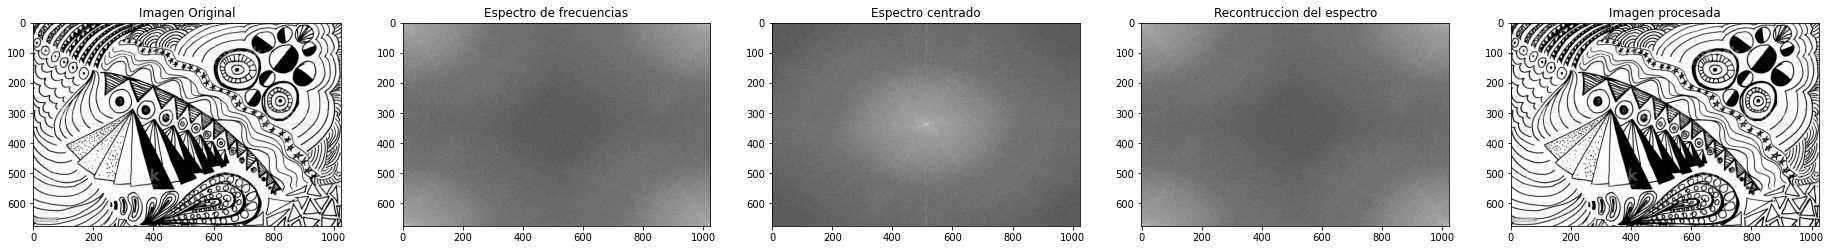

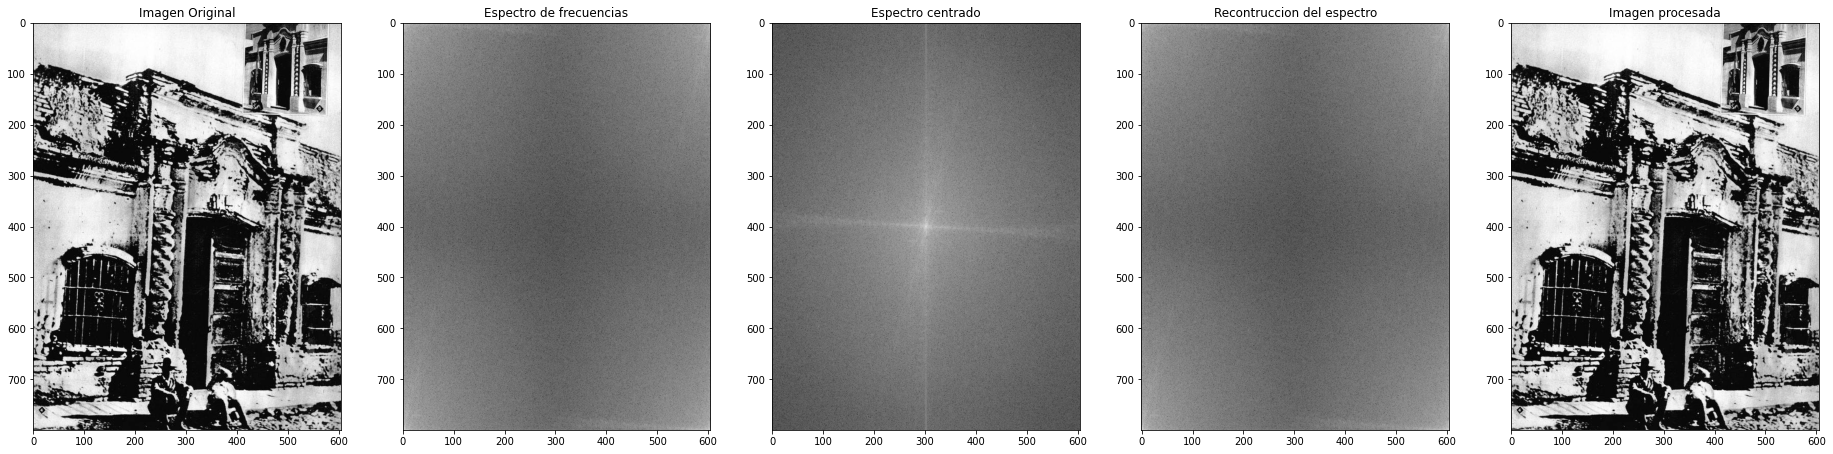

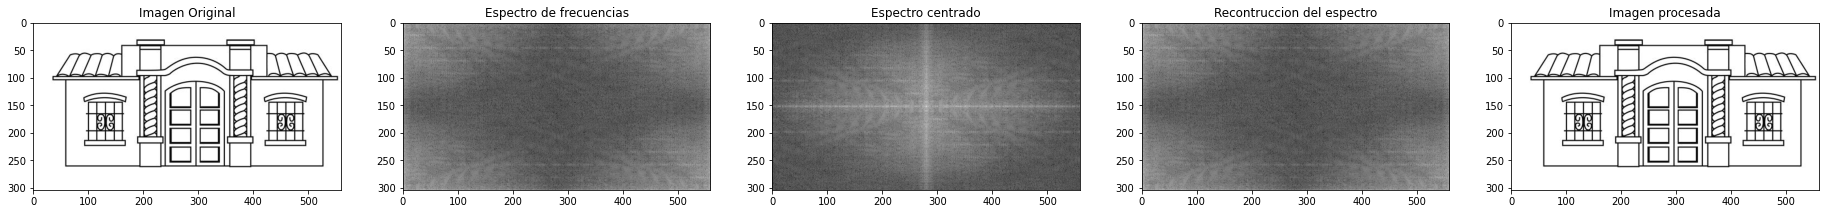

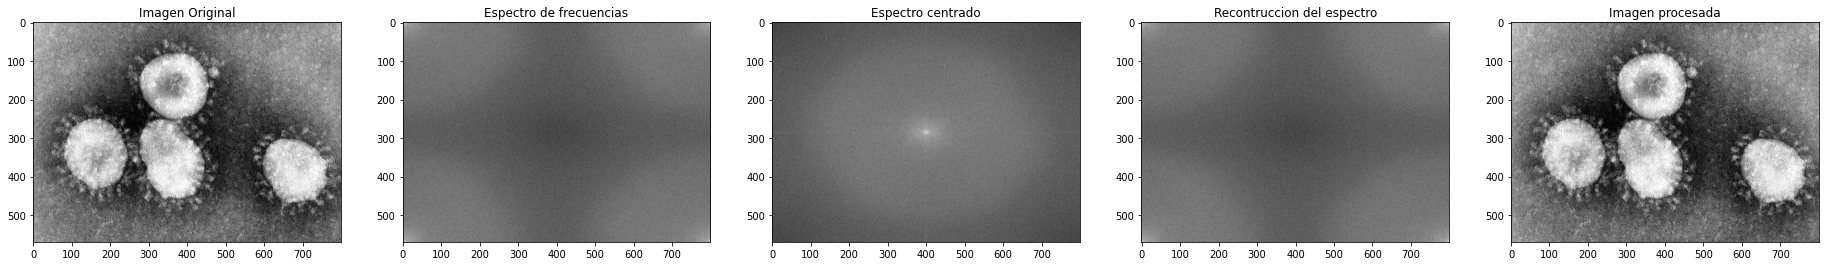

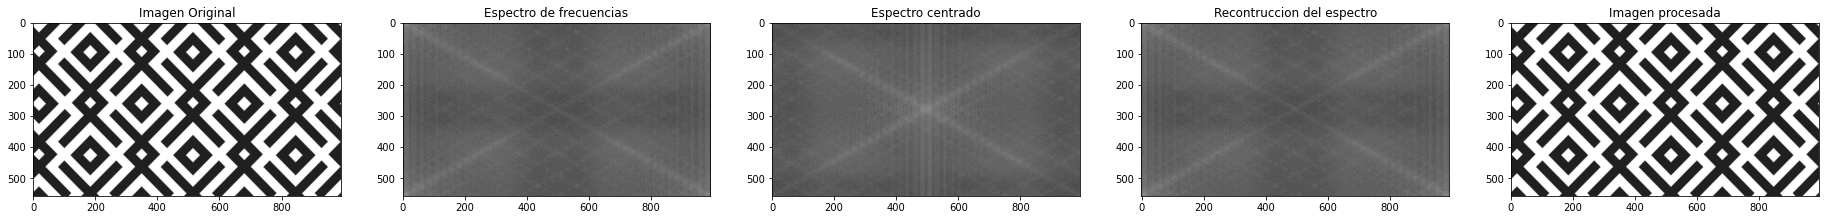

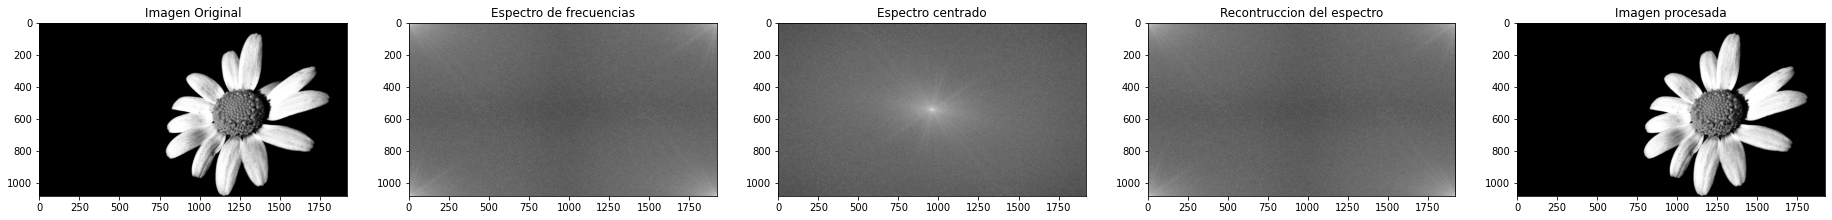

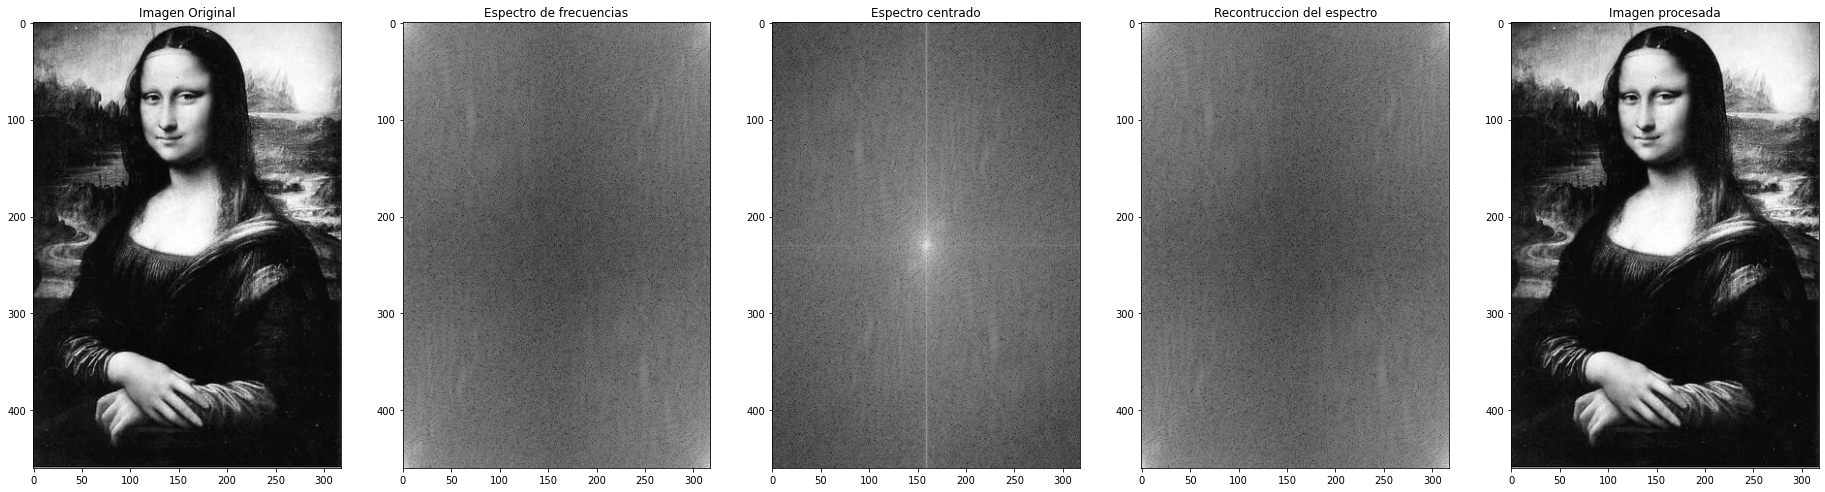

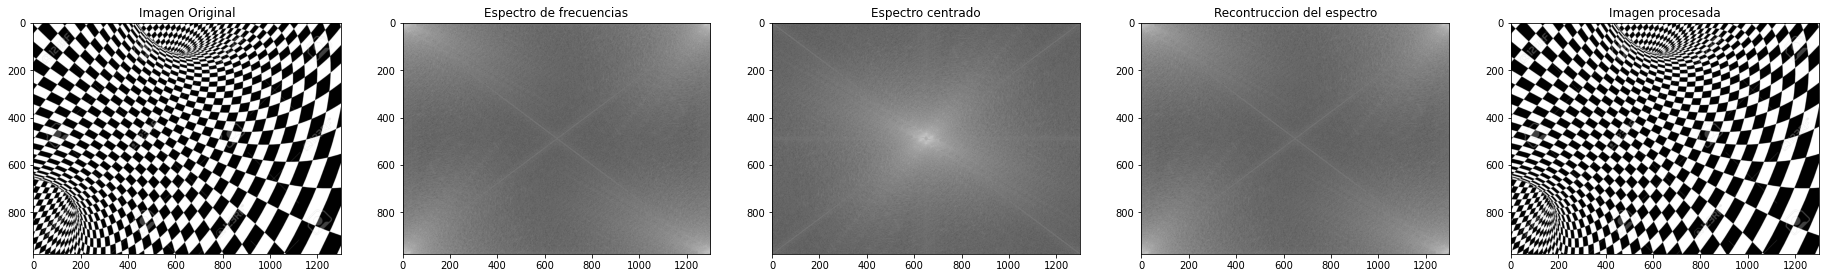

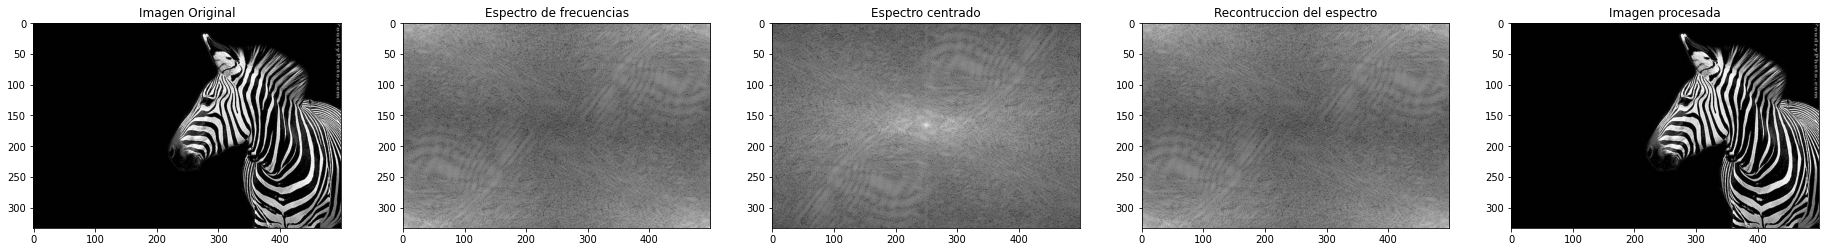

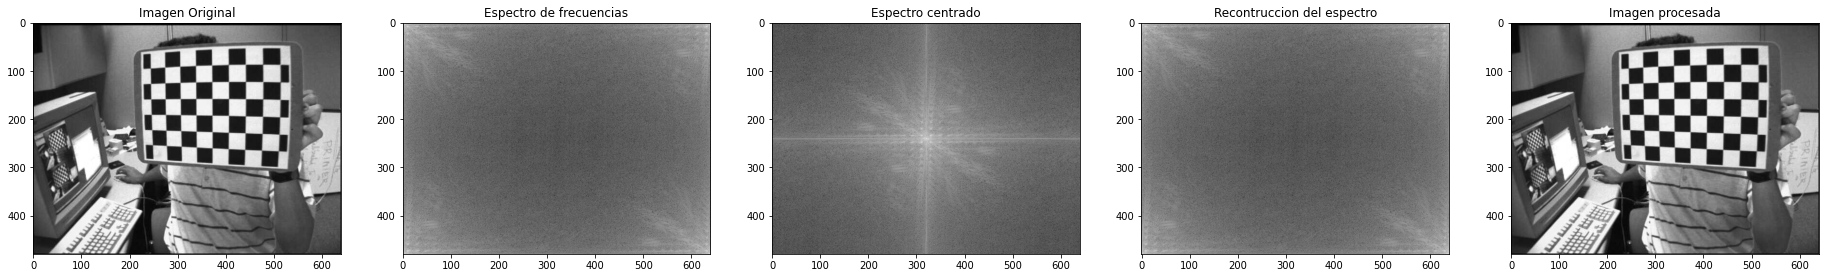

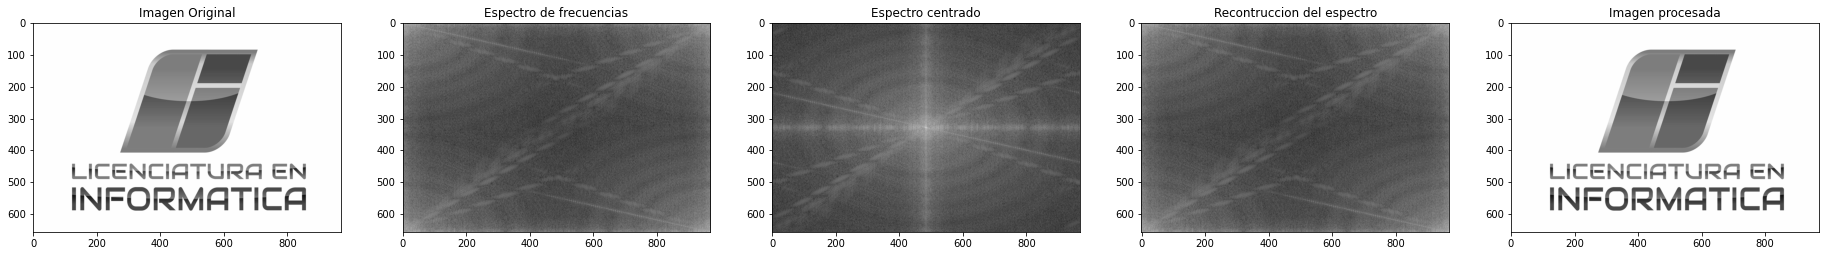

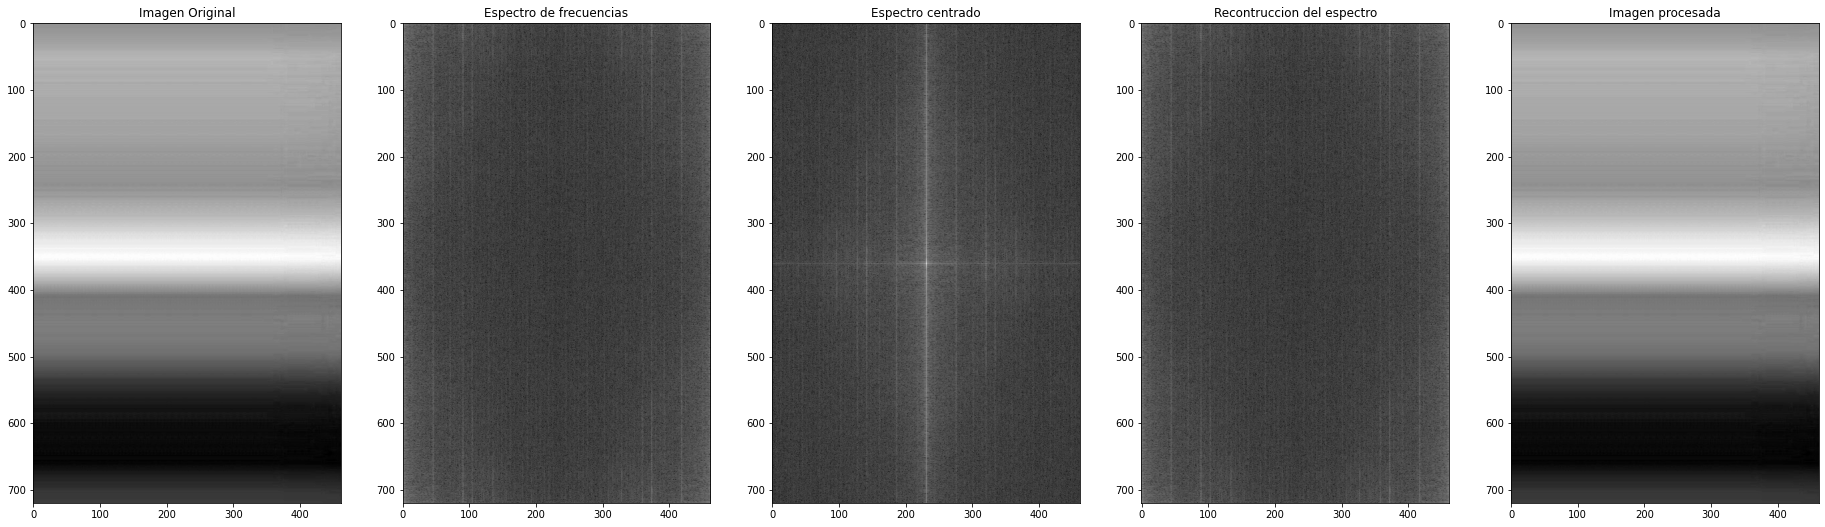

In [13]:
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/01.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/02.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/03.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/04.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/05.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/06.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/07.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/08.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/09.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/10.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/11.jpg")
makeFilters("/content/drive/MyDrive/Colab Notebooks/TP3/12.jpg")

#Respuestas a)



*  CV2.imread: lo que hace es cargar una imagen de un archivo especifico. Si no se puede leer esa imagen entonces el metodo devuelve una matriz vacia.
--
fft.fft2: Esta función calcula la Transformada de Fourier discreta n- dimensional sobre cualquier eje en una matriz M- dimensional por medio de la Transformada Rápida de Fourier (FFT). Por defecto, la transformación se calcula sobre los dos últimos ejes de la matriz de entrada, es decir, una FFT bidimensional. 
--
fft.fftshift: Esta función intercambia medios espacios para todos los ejes enumerados (predeterminado en todos). Tenga en cuenta que y[0]es el componente de Nyquist solo si len(x)es par.
--
fft.ifftshift: El inverso de fftshift. Aunque idénticas para x de longitud par , las funciones difieren en una muestra para x de longitud impar .
--
fft.ifft2: Calcule la transformada de Fourier discreta inversa bidimensional.Esta función calcula el inverso de la Transformada de Fourier discreta bidimensional sobre cualquier número de ejes en una matriz M-dimensional por medio de la Transformada Rápida de Fourier (FFT). En otras palabras, con precisión numérica. De forma predeterminada, la transformación inversa se calcula sobre los dos últimos ejes de la matriz de entrada.ifft2(fft2(a)) == a







Funciones para aplicar filtros en las imagenes


In [3]:
def distance(p1,p2):
    return sqrt((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

#Explique como funciona el filtro pasa-bajo
def FiltroPasaBajo(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base


#Implemente el filtro pasa-alto
def FiltroPasaAlto(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base
    #pass

In [10]:
def FilterLow_FilterHight(path):
  img_c1 = cv2.imread(path, 0)
  plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)

  LowPass = FiltroPasaBajo(50,img_c1.shape)
  plt.subplot(131), plt.imshow(LowPass, "gray"), plt.title("FILTRO PASA BAJO")

  HighPass = FiltroPasaAlto(50,img_c1.shape)
  plt.subplot(132), plt.imshow(HighPass, "gray"), plt.title("FILTRO PASA ALTO")

  plt.show()

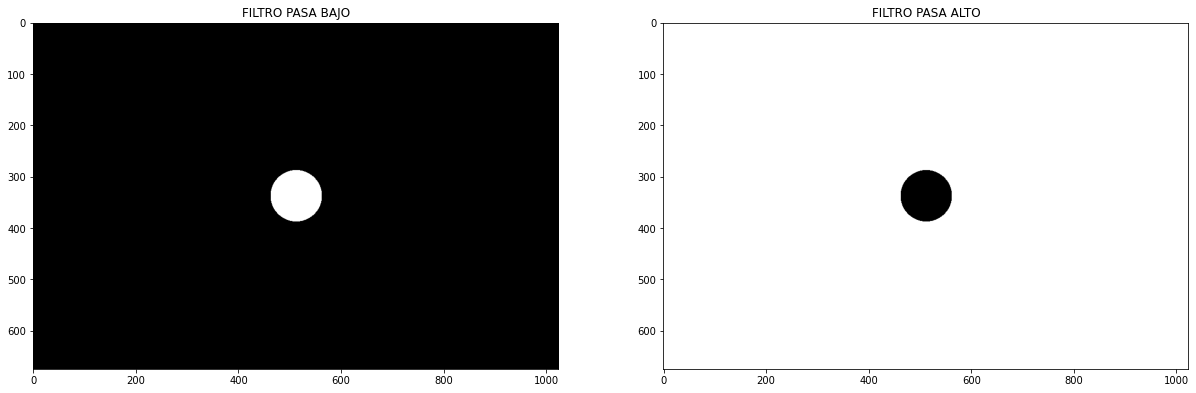

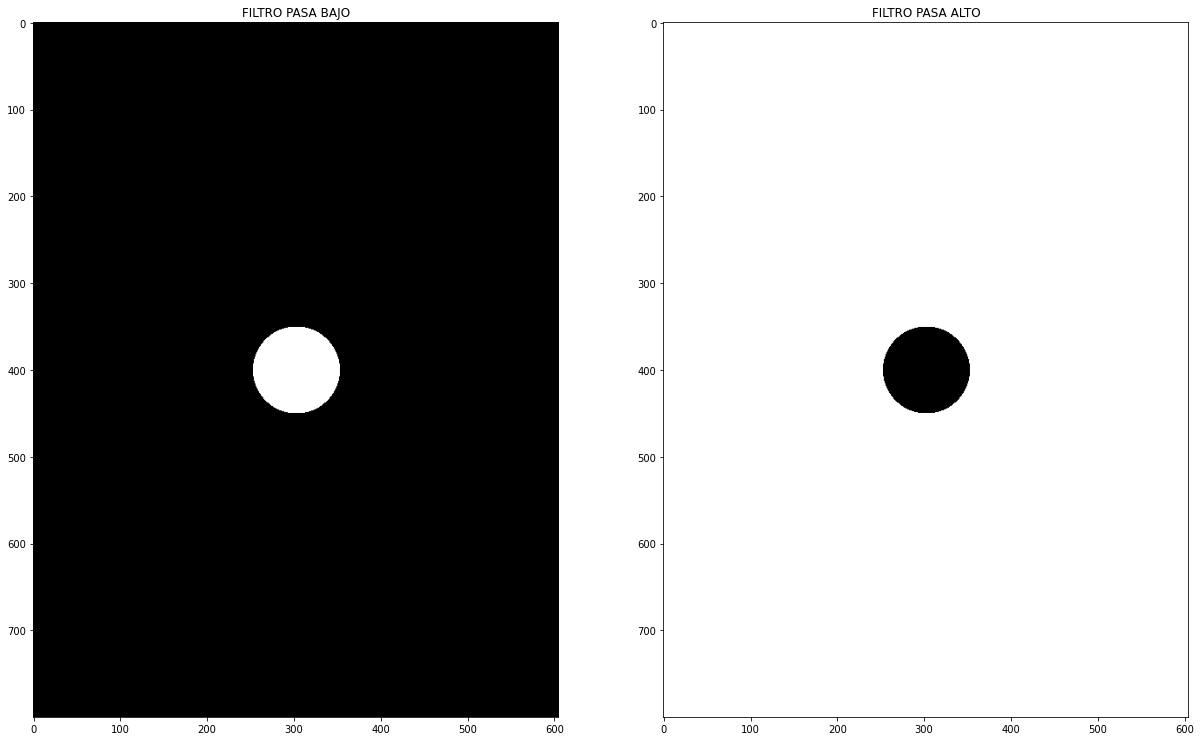

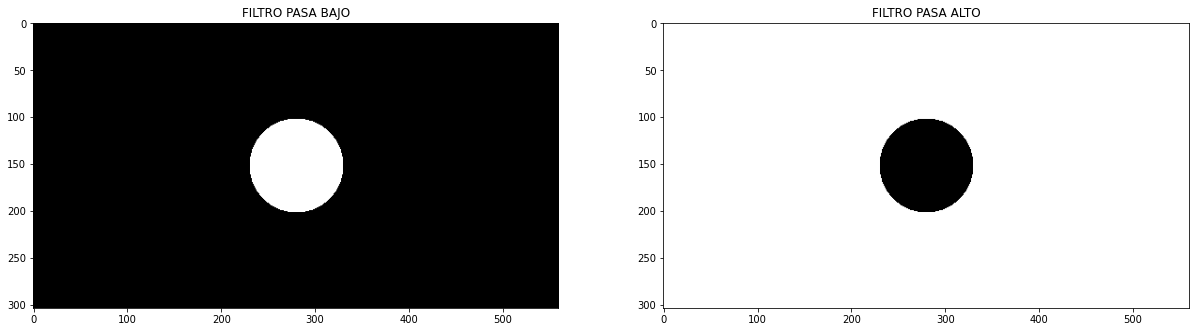

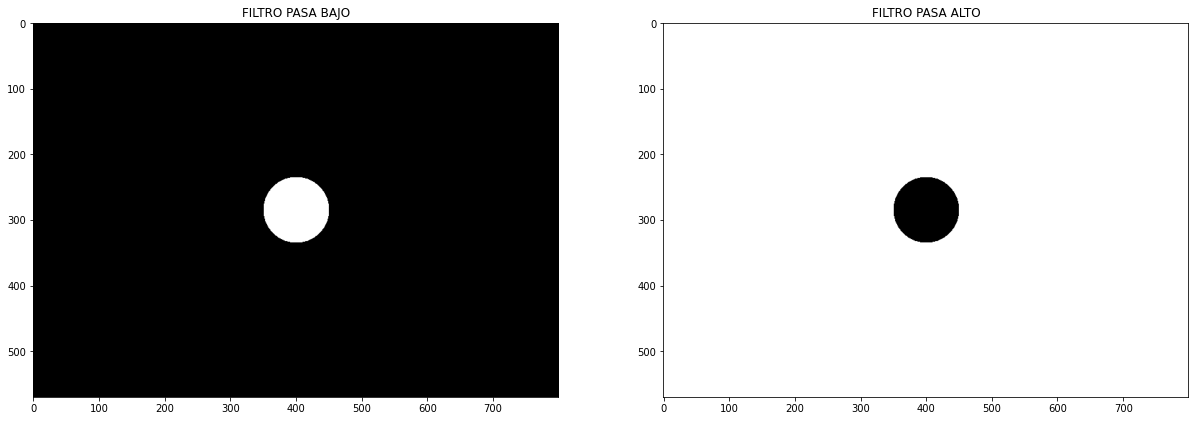

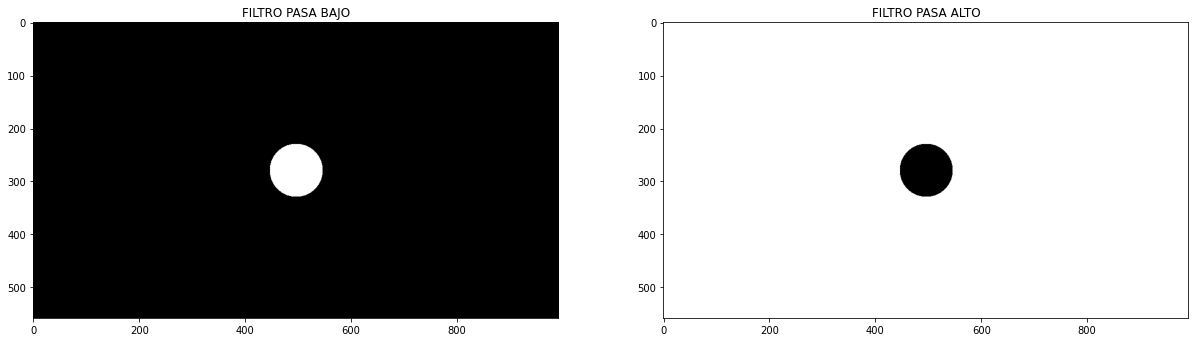

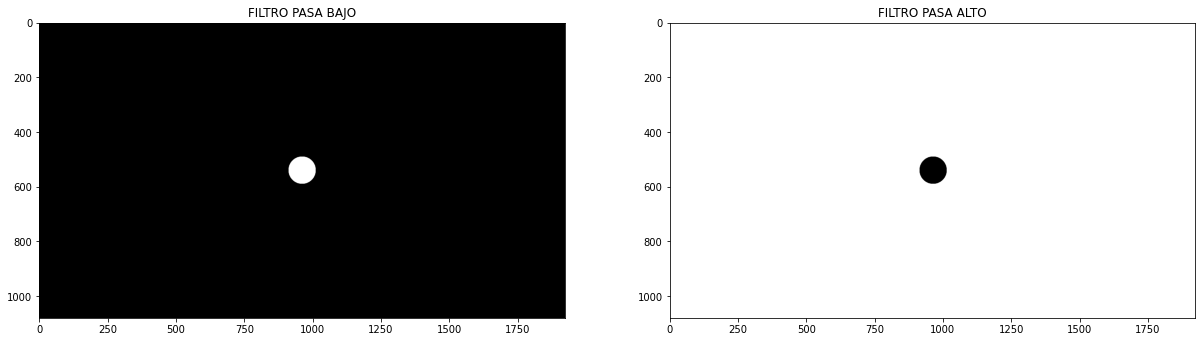

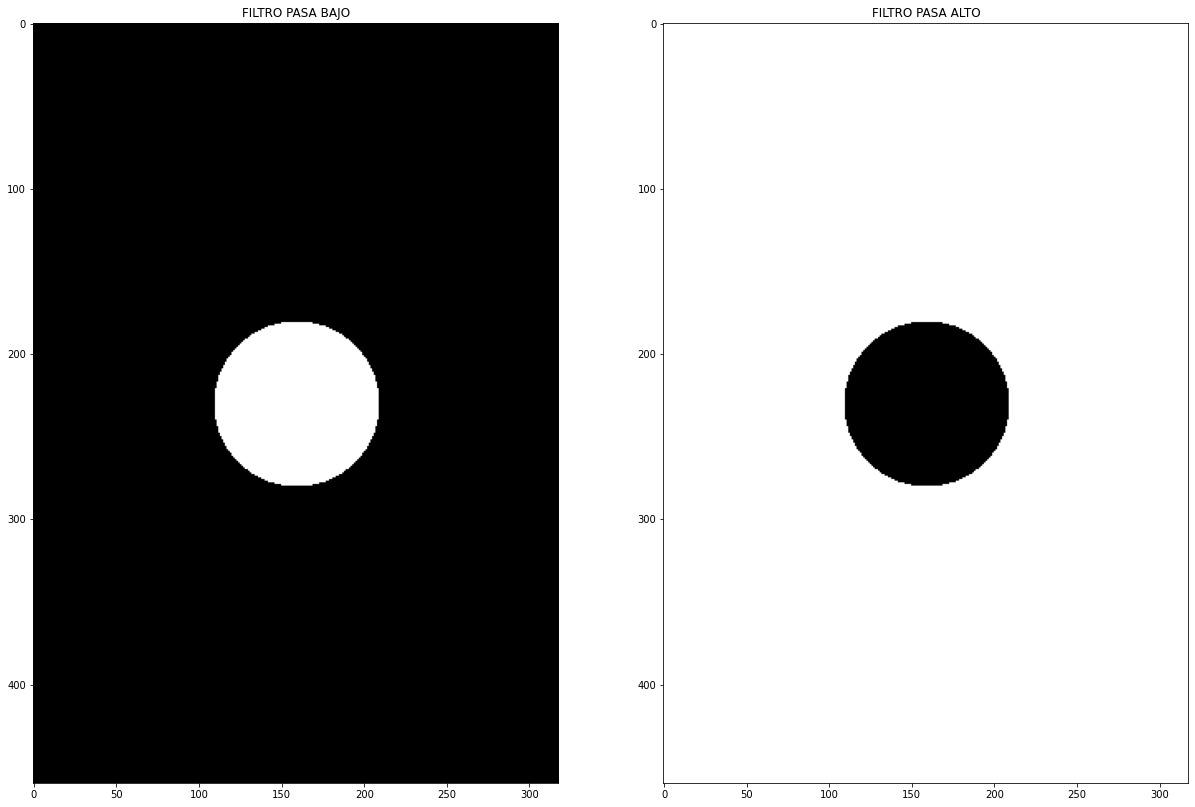

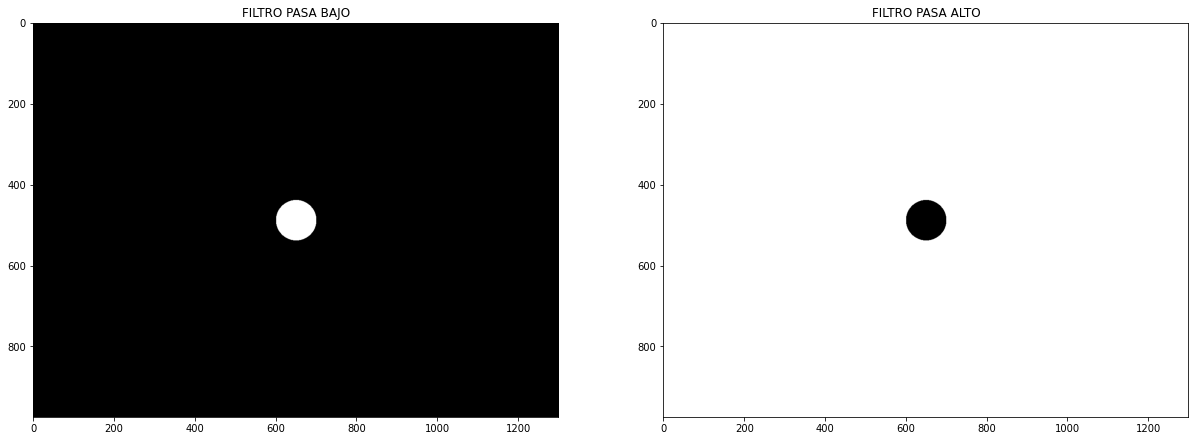

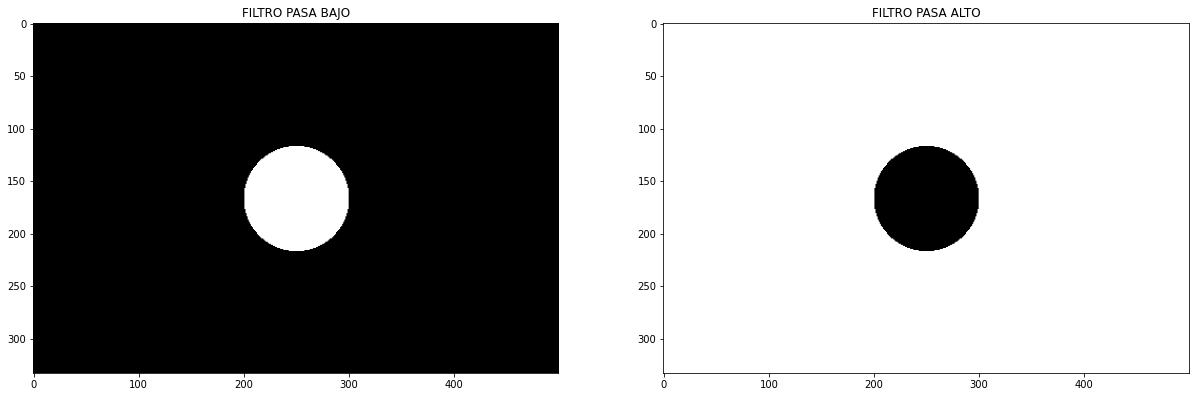

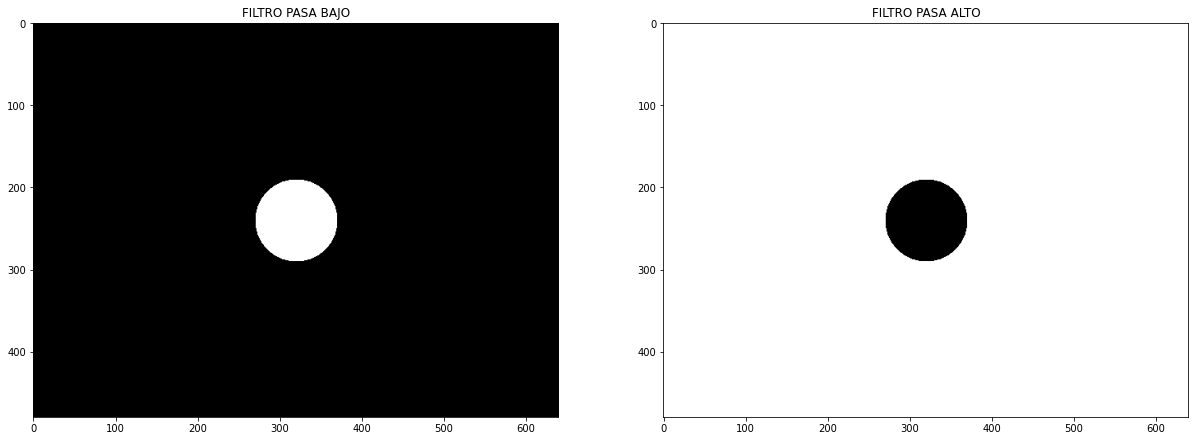

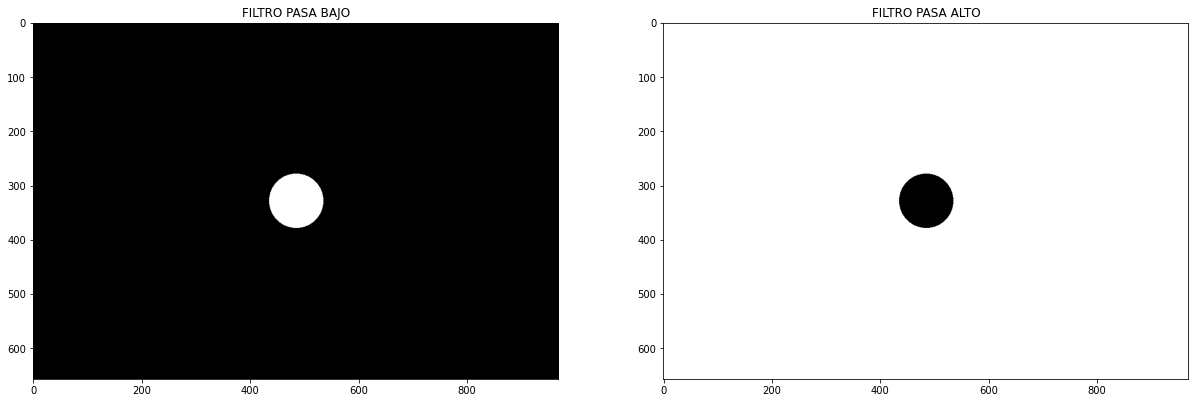

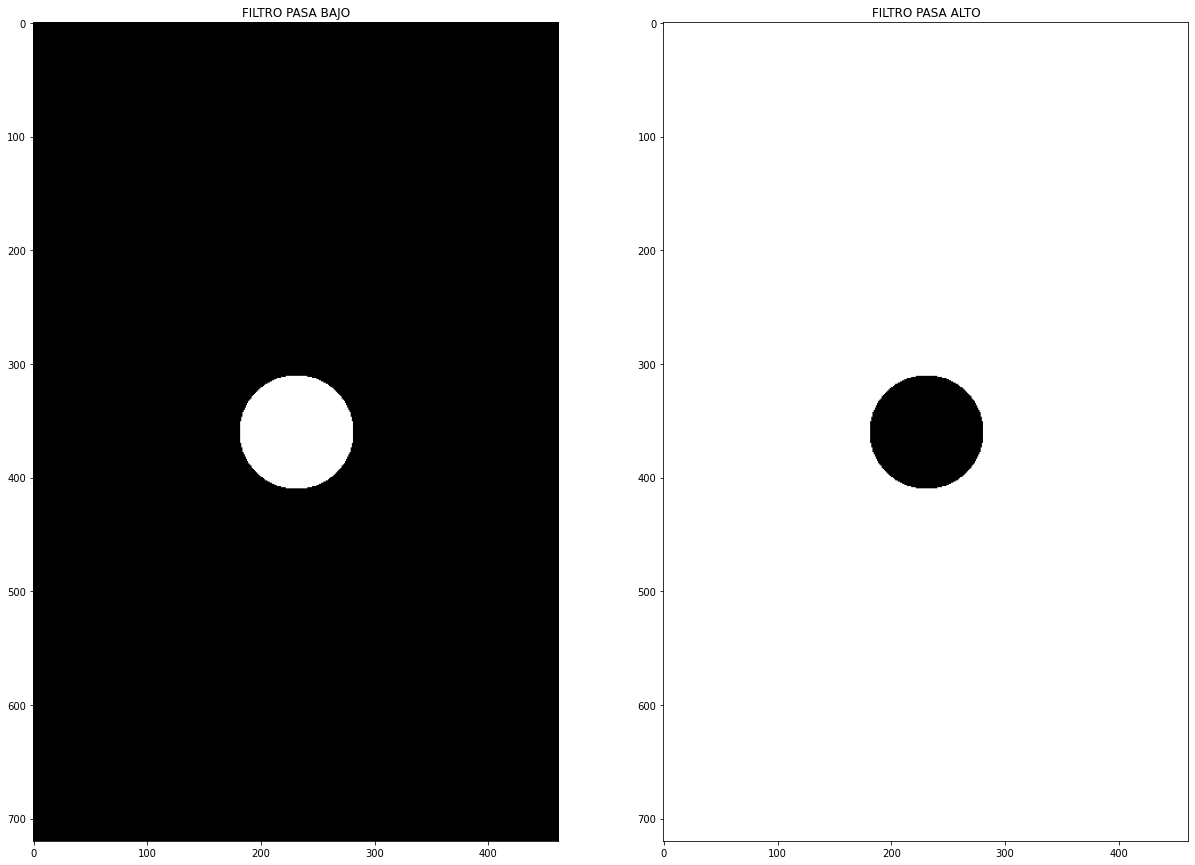

In [11]:
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/01.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/02.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/03.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/04.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/05.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/06.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/07.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/08.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/09.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/10.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/11.jpg")
FilterLow_FilterHight("/content/drive/MyDrive/Colab Notebooks/TP3/12.jpg")